# Pandas intro class 05

Objective:
- Sampling
- Pandas for Timeseries data

## Sampling for your data

Options:
- random sample
- bootstrap sample
- weighted sample
- down/up(over) sample based on specified column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
college = pd.read_csv('data/college.csv')
college.shape

(7535, 27)

Random sample

In [3]:
# random sample
sampling_rate = 0.1
sample_1 = college.sample(frac=sampling_rate, replace=False, random_state=1)

In [4]:
sample_1['instnm'].value_counts()

Branford Academy of Hair and Cosmetology    1
Lincoln Technical Institute-Mahwah          1
University of the West                      1
Miami University-Middletown                 1
Galveston College                           1
                                           ..
Warren County Community College             1
DeVry University-Georgia                    1
Academy of Hair Design-Oklahoma City        1
Brightwood College-Bakersfield              1
ITT Technical Institute-Brooklyn Center     1
Name: instnm, Length: 754, dtype: int64

Bootstrap sample

In [5]:
# boostrap sample
# frac can by >1 here
sample_2 = college.sample(frac=sampling_rate, replace=True, random_state=1)

In [6]:
sample_2.shape

(754, 27)

In [7]:
sample_2['instnm'].value_counts()

Johnson College                                   2
Western Iowa Tech Community College               2
Strayer University-Rockville Campus               2
Hamline University                                2
North Greenville University                       2
                                                 ..
Palladium Technical Academy                       1
University of Phoenix-Arkansas                    1
University of the Potomac-Washington DC Campus    1
Lincoln College of Technology-Denver              1
Concorde Career College-Memphis                   1
Name: instnm, Length: 709, dtype: int64

Weighted sample

In [8]:
# weighted sample
# sampling probability is proportional to weight column
sample_3 = college.sample(n=1000, weights='ugds', random_state=123)

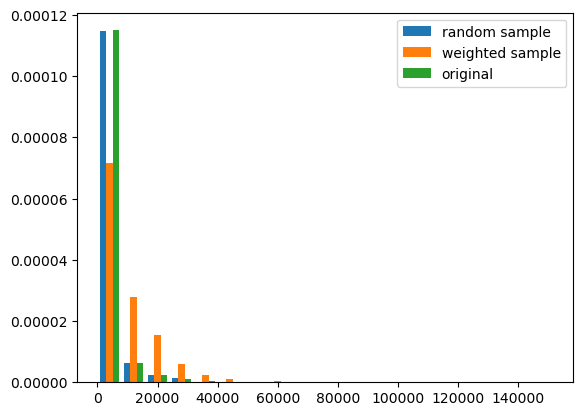

In [9]:
# verify data has more large value than original
bins = np.linspace(0, max(college['ugds']), 20) # pd.cut
plt.hist([sample_1['ugds'], sample_3['ugds'], college['ugds']], bins, 
         label=['random sample', 'weighted sample', 'original'], density=True)
plt.legend(loc='upper right')
plt.show()

Down-sample unwanted rows

You can also use `sklearn.utils.resample` to sample data directly.

In [10]:
college['hbcu'].value_counts()

0.0    7062
1.0     102
Name: hbcu, dtype: int64

In [11]:
college_hbcu = college[college['hbcu']==1]
college_non_hbcu = college[college['hbcu']==0]
college_hbcu.shape, college_non_hbcu.shape

((102, 27), (7062, 27))

In [12]:
ratio = 5 # 0 to 1 ratio
non_hbcu_size = college_hbcu.shape[0] * ratio
non_hbcu_sample = college_non_hbcu.sample(n=non_hbcu_size, replace=False, random_state=123)
non_hbcu_sample.shape

(510, 27)

In [13]:
downsampled_college = pd.concat([college_hbcu, non_hbcu_sample])
downsampled_college['hbcu'].value_counts()

0.0    510
1.0    102
Name: hbcu, dtype: int64

Up-sample wanted rows

In [14]:
ratio = 5
hbcu_size = round(college_non_hbcu.shape[0]/ratio)
hbcu_sample = college_hbcu.sample(n=hbcu_size, replace=True, random_state=123)
hbcu_sample.shape

(1412, 27)

In [15]:
upsampled_college = pd.concat([hbcu_sample, college_non_hbcu])
upsampled_college['hbcu'].value_counts()

0.0    7062
1.0    1412
Name: hbcu, dtype: int64

## Time series data analysis

Pandas has an intro: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

We will cover some simple methods:
- create a date range
- convert string data to a timestamp
- work with timestamp data
- index and slice your time series data in a data frame
- resample your time series for different time period aggregates/summary statistics
- compute a rolling statistic/window function such as a rolling average
- filling missing
- quick differencing

In [16]:
from datetime import datetime

#### Create a date range

In [17]:
date_rng = pd.date_range(start='5/1/2020', end='5/12/2020', freq='H')
date_rng

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 01:00:00',
               '2020-05-01 02:00:00', '2020-05-01 03:00:00',
               '2020-05-01 04:00:00', '2020-05-01 05:00:00',
               '2020-05-01 06:00:00', '2020-05-01 07:00:00',
               '2020-05-01 08:00:00', '2020-05-01 09:00:00',
               ...
               '2020-05-11 15:00:00', '2020-05-11 16:00:00',
               '2020-05-11 17:00:00', '2020-05-11 18:00:00',
               '2020-05-11 19:00:00', '2020-05-11 20:00:00',
               '2020-05-11 21:00:00', '2020-05-11 22:00:00',
               '2020-05-11 23:00:00', '2020-05-12 00:00:00'],
              dtype='datetime64[ns]', length=265, freq='H')

In [18]:
# create df
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))
df.head()

,date,data
0,2020-05-01 00:00:00,81
1,2020-05-01 01:00:00,89
2,2020-05-01 02:00:00,90
3,2020-05-01 03:00:00,65
4,2020-05-01 04:00:00,83


#### Convert the data frame index to a datetime index

In [19]:
# convert index
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2020-05-01 00:00:00,81
2020-05-01 01:00:00,89
2020-05-01 02:00:00,90
2020-05-01 03:00:00,65
2020-05-01 04:00:00,83


#### Convert string data to a timestamp

In [20]:
# generate fake strings to parse
string_date_rng = [str(x) for x in date_rng]
type(string_date_rng[0])

str

In [21]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 01:00:00',
               '2020-05-01 02:00:00', '2020-05-01 03:00:00',
               '2020-05-01 04:00:00', '2020-05-01 05:00:00',
               '2020-05-01 06:00:00', '2020-05-01 07:00:00',
               '2020-05-01 08:00:00', '2020-05-01 09:00:00',
               ...
               '2020-05-11 15:00:00', '2020-05-11 16:00:00',
               '2020-05-11 17:00:00', '2020-05-11 18:00:00',
               '2020-05-11 19:00:00', '2020-05-11 20:00:00',
               '2020-05-11 21:00:00', '2020-05-11 22:00:00',
               '2020-05-11 23:00:00', '2020-05-12 00:00:00'],
              dtype='datetime64[ns]', length=265, freq=None)

In [22]:
# other formats work too as long as you specify
string_date_rng_2 = ['June-01-2018', 'June-02-2018', 'June-03-2018']
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2

[datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 6, 2, 0, 0),
 datetime.datetime(2018, 6, 3, 0, 0)]

#### Indexing and slicing

In [24]:
# index by day / hour
df[df.index.hour == 2]

,data
datetime,
2020-05-01 02:00:00,90
2020-05-02 02:00:00,82
2020-05-03 02:00:00,39
2020-05-04 02:00:00,37
2020-05-05 02:00:00,90
2020-05-06 02:00:00,35
2020-05-07 02:00:00,78
2020-05-08 02:00:00,3
2020-05-09 02:00:00,1


In [25]:
# index by date
df['2020-05-02']

/var/folders/tn/0z9twpqx19g80xjvqb4w0_jw0000gn/T/ipykernel_42210/980558262.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-05-02']


,data
datetime,
2020-05-02 00:00:00,75
2020-05-02 01:00:00,41
2020-05-02 02:00:00,82
2020-05-02 03:00:00,64
2020-05-02 04:00:00,0
2020-05-02 05:00:00,85
2020-05-02 06:00:00,20
2020-05-02 07:00:00,52
2020-05-02 08:00:00,72


In [26]:
# slicing using time
df['2020-05-04 12:00:00':'2020-05-05 00:00:00']

,data
datetime,
2020-05-04 12:00:00,26
2020-05-04 13:00:00,56
2020-05-04 14:00:00,26
2020-05-04 15:00:00,9
2020-05-04 16:00:00,47
2020-05-04 17:00:00,64
2020-05-04 18:00:00,68
2020-05-04 19:00:00,82
2020-05-04 20:00:00,26


#### Resample the data at a different frequency
Note: differnet concept as the sampling we discussed before

In [29]:
df.resample('D').mean() # sum()

,data
datetime,
2020-05-01,54.458333
2020-05-02,50.291667
2020-05-03,50.625000
2020-05-04,44.375000
2020-05-05,50.333333
2020-05-06,47.875000
2020-05-07,51.166667
2020-05-08,51.041667
2020-05-09,46.791667


In [30]:
# you can iterate through resampled data
resampled = df.resample('2W')

for name, group in resampled:
    print("Group: ", name)
    print("-" * 27)
    print(group, end="\n\n")

Group:  2020-05-03 00:00:00
---------------------------
                     data
datetime                 
2020-05-01 00:00:00    81
2020-05-01 01:00:00    89
2020-05-01 02:00:00    90
2020-05-01 03:00:00    65
2020-05-01 04:00:00    83
...                   ...
2020-05-03 19:00:00    26
2020-05-03 20:00:00    69
2020-05-03 21:00:00    85
2020-05-03 22:00:00    41
2020-05-03 23:00:00    45

[72 rows x 1 columns]

Group:  2020-05-17 00:00:00
---------------------------
                     data
datetime                 
2020-05-04 00:00:00    10
2020-05-04 01:00:00    40
2020-05-04 02:00:00    37
2020-05-04 03:00:00    73
2020-05-04 04:00:00    51
...                   ...
2020-05-11 20:00:00    37
2020-05-11 21:00:00    59
2020-05-11 22:00:00    87
2020-05-11 23:00:00    51
2020-05-12 00:00:00    47

[193 rows x 1 columns]



#### Window function (e.g. rolling average)
Specify `win_type` for advanced aggregation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html#pandas.Series.rolling

In [31]:
df['rolling_avg'] = df.rolling(3).mean()
df.head()

,data,rolling_avg
datetime,,
2020-05-01 00:00:00,81,NaN
2020-05-01 01:00:00,89,NaN
2020-05-01 02:00:00,90,86.666667
2020-05-01 03:00:00,65,81.333333
2020-05-01 04:00:00,83,79.333333


In [32]:
df['data'].rolling('2d').sum()

datetime
2020-05-01 00:00:00      81.0
2020-05-01 01:00:00     170.0
2020-05-01 02:00:00     260.0
2020-05-01 03:00:00     325.0
2020-05-01 04:00:00     408.0
                        ...  
2020-05-11 20:00:00    2470.0
2020-05-11 21:00:00    2513.0
2020-05-11 22:00:00    2541.0
2020-05-11 23:00:00    2590.0
2020-05-12 00:00:00    2560.0
Name: data, Length: 265, dtype: float64

#### Quick difference

In [33]:
df['first_diff'] = df['data'].diff()
df['second_diff'] = df['first_diff'].diff()
df.head()

,data,rolling_avg,first_diff,second_diff
datetime,,,,
2020-05-01 00:00:00,81,NaN,NaN,NaN
2020-05-01 01:00:00,89,NaN,8.0,NaN
2020-05-01 02:00:00,90,86.666667,1.0,-7.0
2020-05-01 03:00:00,65,81.333333,-25.0,-26.0
2020-05-01 04:00:00,83,79.333333,18.0,43.0


#### Filling missing

In [49]:
# be aware of time traveling
df['bf_rolling_avg'] = df['rolling_avg'].fillna(method='backfill')
df.head()

,data,rolling_avg,first_diff,second_diff,bf_rolling_avg
datetime,,,,,
2020-05-01 00:00:00,16,NaN,NaN,NaN,22.000000
2020-05-01 01:00:00,16,NaN,0.0,NaN,22.000000
2020-05-01 02:00:00,34,22.000000,18.0,18.0,22.000000
2020-05-01 03:00:00,76,42.000000,42.0,24.0,42.000000
2020-05-01 04:00:00,53,54.333333,-23.0,-65.0,54.333333


#### Plotting
- `lag_plot`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.lag_plot.html
- `autocorrelation_plot`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.autocorrelation_plot.html

In [34]:
from pandas.plotting import autocorrelation_plot, lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

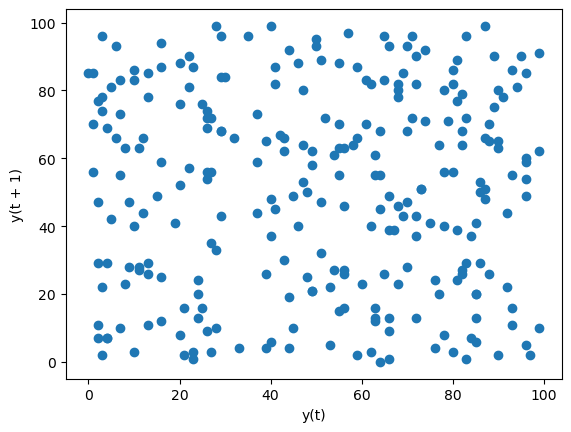

In [35]:
lag_plot(df['data'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

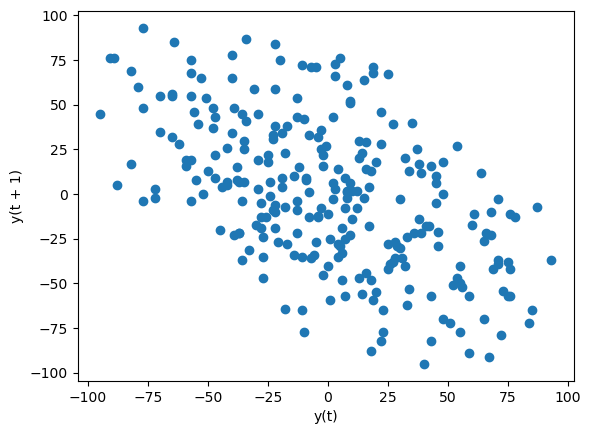

In [36]:
lag_plot(df['first_diff'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

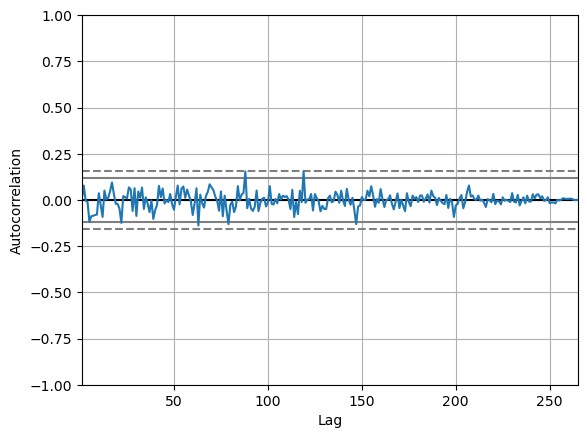

In [37]:
autocorrelation_plot(df['data'])